# TP-Parte1: Kaggle - Competição de aprendizagem automática

O presente trabalho foi desenvolvido no âmbito da disciplina de Aprendizagem Automática e tem como objetivo prever preços de automóveis através do treino e comparação de diversos modelos de aprendizagem supervisionada.

Para identificar o modelo com melhor desempenho, foi utilizado o Cross-Validation, para garantir uma avaliação mais consistente dos resultados, e também o Grid-Search, para a otimização dos hiperparâmetros, permitindo encontrar o melhor desempenho global.

# Limpeza do Dataset

Antes do treino dos modelos, foi feito a limpeza e preparação do dataset. Foram tratados falores em falta, removidos registos inconsistentes e também formatos de dados que foram ajustados para uma melhor leitura do dataset.

Nesta primeira célula foram importadas todas as bibliotecas utilizadas neste trabalho.
- Pandas `pd`- leitura, manipulação, criação de Dataframens.
- Numpy `np`- utilizada para fazer operações matemáticas, como tranformações logarítmas.
- `re`- Limpeza de texto e tratamento de dados
- `os`- Verificar existência de ficheiros no sistema.
- Matploit.pyplot `plt`- Criação e visualização de gráficos.
- Sklearn.preprocessing `OneHotEncoder` - transforma variáveis categóricas em variáveis numéricas.
- sklearn.linear_model `LinearRegression`- Implementa o modelo de Regressão Linear.
- Sklearn.neighbors `KNeighborsRegressor`- Implementa o algoritmo KNN.
- Sklearn.model_selection `GridSearchCV` - Utilizado para a otimização de hiperparâmetros, testando diferentes combinações e selecionando a que apresenta melhor desempenho.
- Sklearn.preprocessing `StandardScaler`- Responsável pela normalização das variáveis numéricas, garantindo que todas têm a mesma escala.
- Sklearn.ensemble `RandomForestRegressor` - Implementa o modelo de Random Forest.
- Xgboost `xgb`- Implementa o modelo de XGBoost.
- Sklearn.metrics `mean_absolute_error, r2_score` - Métricas utilizadas para avaliar o desempenho dos modelos, medindo o erro médio absoluto e a qualidade do ajuste.
- Matplotlib.ticker `FuncFormatter`- Utilizado para formatar os eixos dos gráficos, apresenta os valores em euros após a reversão da transformação logarítmica.
- Sklearn.svm `LinearSVR` - Implementa uma versão linear do Support Vector Regression.
- Sklearn.tree `DecisionTreeRegressor`- Implementa o modelo de Árvore de Decisão.
- Sklearn.neural_networ `kMLPRegressor`- Implementa o modelo de Redes Neurais.
- Sklearn.model_selection `cross_val_score`- Utilizado para realizar Cross-Validation, garantindo uma avaliação mais consistente dos modelos.
- joblib `dump, load` - Utilizado para guardar e carregar modelos treinados, evitando a necessidade de os treinar novamente.

In [ ]:
import pandas as pd 
import numpy as np
import re
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_error
from matplotlib.ticker import FuncFormatter
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from joblib import dump, load





Aqui foram carregados os ficheiros csv de treino e teste para poder fazer a limpeza e posteriormente o treino dos modelos.

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [4]:
### ----------------TRAIN------------------------------------------------------
train['horsepower'] = train['engine'].str.extract('(\d+\.?\d*)HP').astype(float)
train['displacement'] = train['engine'].str.extract(r'(\d+\.?\d*)L').astype(float)
train['cylinders'] = train['engine'].str.extract(r'(\d+)\s*Cylinder').astype(float)

no_engine = (train['horsepower'].isnull() & train['horsepower'].isnull() & train['horsepower'].isnull())
train['eletric'] = np.where(no_engine, 1,0)
train.drop(columns= ['engine'], inplace=True)

### ----------------TESTE------------------------------------------------------
test['horsepower'] = test['engine'].str.extract('(\d+\.?\d*)HP').astype(float)
test['displacement'] = test['engine'].str.extract(r'(\d+\.?\d*)L').astype(float)
test['cylinders'] = test['engine'].str.extract(r'(\d+)\s*Cylinder').astype(float)
test['fuel_type'] = test['fuel_type'].replace('not supported', 'unknown')

no_engine = (test['horsepower'].isnull() & test['displacement'].isnull() & test['cylinders'].isnull())
test['eletric'] = np.where(no_engine, 1, 0)
test.drop(columns=['engine'], inplace=True)



<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\thleal\AppData\Local\Temp\ipykernel_29192\969259585.py:2: SyntaxWarning: invalid escape sequence '\d'
  train['horsepower'] = train['engine'].str.extract('(\d+\.?\d*)HP').astype(float)
C:\Users\thleal\AppData\Local\Temp\ipykernel_29192\969259585.py:11: SyntaxWarning: invalid escape sequence '\d'
  test['horsepower'] = test['engine'].str.extract('(\d+\.?\d*)HP').astype(float)


In [5]:
### ----------------TRAIN------------------------------------------------------

train = train.fillna({'fuel_type': 'unknown', 'clean_title': 0, 'accident': 'unknown', 'horsepower': 0, 'displacement': 0, 'cylinders': 0})
replace_cols = ['fuel_type', 'ext_col', 'int_col']

for col in replace_cols:
    train[col] = train[col].replace({'–': 'unknown'})
    
### ----------------TEST------------------------------------------------------

test = test.fillna({'fuel_type': 'unknown', 'clean_title': 0, 'accident': 'unknown', 'horsepower': 0, 'displacement': 0, 'cylinders': 0})
    
for col in ['fuel_type', 'ext_col', 'int_col']:
    test[col] = test[col].replace({'–': 'unknown'})


In [6]:
accident = {
    'None reported': 0,
    'At least 1 accident or damage reported' : 1,
    'unknown' : 0
}

### ----------------TRAIN------------------------------------------------------
train['clean_title'] = train['clean_title'].astype('category')
train['clean_title'] = train['clean_title'].cat.codes

train['accident'] = train['accident'].map(accident)

### ----------------TEST------------------------------------------------------

test['clean_title'] = test['clean_title'].astype('category')
test['clean_title'] = test['clean_title'].cat.codes

test['accident'] = test['accident'].map(accident)



In [7]:
ohe_fuel = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

### ----------------TRAIN------------------------------------------------------
train['fuel_type'] = train['fuel_type'].astype('category')
fuel_ohe_train = ohe_fuel.fit_transform(train[['fuel_type']])
fuel_ohe_train_df = pd.DataFrame(fuel_ohe_train, 
                                 columns=ohe_fuel.get_feature_names_out(['fuel_type']),
                                 index=train.index)

train = pd.concat([train.drop(columns=['fuel_type']), fuel_ohe_train_df], axis=1)

### ----------------TEST------------------------------------------------------
test['fuel_type'] = test['fuel_type'].astype('category')
fuel_ohe_test = ohe_fuel.transform(test[['fuel_type']])
fuel_ohe_test_df = pd.DataFrame(fuel_ohe_test, 
                                columns=ohe_fuel.get_feature_names_out(['fuel_type']),
                                index=test.index)

test = pd.concat([test.drop(columns=['fuel_type']), fuel_ohe_test_df], axis=1)



In [8]:
train['transmission_type'] = train['transmission'].str.extract(
    r'(A/T|M/T|CVT|Auto-Shift|Dual Shift|Overdrive Switch|Automatic|Manual)'
)
train['transmission_speed'] = train['transmission'].str.extract('(\d+\.?\d*)-Speed').astype(float)
train = train.fillna({'transmission_speed': 0, 'transmission_type': 'unknown'})

train = train.drop('transmission', axis = 1)
 
# Extrair tipo de transmissão
test['transmission_type'] = test['transmission'].str.extract(
    r'(A/T|M/T|CVT|Auto-Shift|Dual Shift|Overdrive Switch|Automatic|Manual)'
)

#-----TEST----
# Extrair velocidade (pode não existir → vira NaN e depois tratamos)
test['transmission_speed'] = test['transmission'].str.extract('(\d+\.?\d*)-Speed')

# Converter transmission_speed para float (com errors='coerce' para evitar crash)
test['transmission_speed'] = pd.to_numeric(test['transmission_speed'], errors='coerce')

# Preencher valores em falta da mesma forma que no train
test = test.fillna({
    'transmission_speed': 0,
    'transmission_type': 'unknown'
})

# Remover coluna original (igual ao train)
test = test.drop(columns=['transmission'])



<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
C:\Users\thleal\AppData\Local\Temp\ipykernel_29192\2478492734.py:4: SyntaxWarning: invalid escape sequence '\d'
  train['transmission_speed'] = train['transmission'].str.extract('(\d+\.?\d*)-Speed').astype(float)
C:\Users\thleal\AppData\Local\Temp\ipykernel_29192\2478492734.py:16: SyntaxWarning: invalid escape sequence '\d'
  test['transmission_speed'] = test['transmission'].str.extract('(\d+\.?\d*)-Speed')


In [9]:
train['transmission_type'] = train['transmission_type'].astype('category')
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output= False).set_output(transform='pandas')
ohetransform = ohe.fit_transform(train[['transmission_type']]).astype(int)
train = pd.concat([train, ohetransform], axis=1).drop(columns=['transmission_type'])

# Garantir que a coluna é category
test['transmission_type'] = test['transmission_type'].astype('category')

# Usar o encoder treinado no train (ohe)
ohe_test = ohe.transform(test[['transmission_type']]).astype(int)

# Criar DataFrame com as colunas corretas
ohe_test_df = pd.DataFrame(
    ohe_test,
    columns=ohe.get_feature_names_out(['transmission_type']),
    index=test.index
)

# Concatenar e remover a coluna original
test = pd.concat([test.drop(columns=['transmission_type']), ohe_test_df], axis=1)


In [10]:

ext_colors = train['ext_col'].astype(str)
int_colors = train['int_col'].astype(str)
ext_colors_test = test['ext_col'].astype(str)
int_colors_test = test['int_col'].astype(str)

one_ext_color = ext_colors[ext_colors.str.contains(r'^[A-Za-zÀ-ÿ]+$', regex=True)].unique().tolist()
one_int_color = int_colors[int_colors.str.contains(r'^[A-Za-zÀ-ÿ]+$', regex=True)].unique().tolist()

colors_map = {c.lower(): c for c in one_ext_color}
def normalize_color(color):
    lower_color = color.lower()
    for word, base_color in colors_map.items():
        if re.search(rf'\b{word}\b', lower_color):
            return base_color
    return color

In [11]:
train['ext_col']= ext_colors.apply(normalize_color)
train['int_col'] = int_colors.apply(normalize_color)

test['ext_col'] = ext_colors_test.apply(normalize_color)
test['int_col'] = int_colors_test.apply(normalize_color)

train['all_colors'] = train[['int_col', 'ext_col']].values.tolist()
test['all_colors'] = test[['int_col', 'ext_col']].values.tolist()


exploded_train = train['all_colors'].explode()
exploded_test = test['all_colors'].explode()


count_df_train = pd.crosstab(exploded_train.index, exploded_train)

count_df_test = pd.crosstab(exploded_test.index, exploded_test)

count_df_train_columns = [c for c in count_df_train.columns]

count_df_test.columns = [c for c in count_df_test.columns]


train = pd.concat([train, count_df_train], axis=1).drop(columns=['int_col', 'ext_col', 'all_colors'])
test = pd.concat([test.drop(columns=['int_col','ext_col','all_colors']), count_df_test], axis=1)



In [12]:
train['brand'] = train['brand'].astype('category')

# criar e treinar o encoder
ohe_brand = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
brand_train = ohe_brand.fit_transform(train[['brand']]).astype(int)

# concatenar com o train e remover a coluna original
train = pd.concat([train.drop(columns=['brand']), brand_train], axis=1)


# usar o encoder treinado no train
brand_test = ohe_brand.transform(test[['brand']]).astype(int)

# criar DataFrame com colunas corretas
brand_test_df = pd.DataFrame(
    brand_test,
    columns=ohe_brand.get_feature_names_out(['brand']),
    index=test.index
)

# concatenar e remover a coluna original
test = pd.concat([test.drop(columns=['brand']), brand_test_df], axis=1)


In [13]:
# drops em colunas que não serão necessárias para as previsões 

drop_cols = ['transmission_type_unknown', 'fuel_type_unknown', 'fuel_type_not supported', 'unknown']

train = train.drop(columns=drop_cols, axis=1)
test = test.drop(columns=drop_cols, axis=1)


In [14]:
# Tratar da coluna model - mediana

train_model = train.groupby('model')['price'].median()
train['model'] = train['model'].map(train_model)

test['model'] = test['model'].map(train_model)

test = test.fillna({'model' : 0})


In [15]:
X_train = train.drop(columns=['price', 'id'])
X_test = test.drop(columns= 'id')

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# No início do seu bloco de treino:
Y_train_original = train['price'] 
Y_train_log = np.log1p(Y_train_original) # log(x+1) é usado para evitar log(0)
# Treine o modelo usando Y_train_log



# Linear Regression

Carregando Regressão Linear
RMSE médio (CV) da Regressão Linear: 0.52


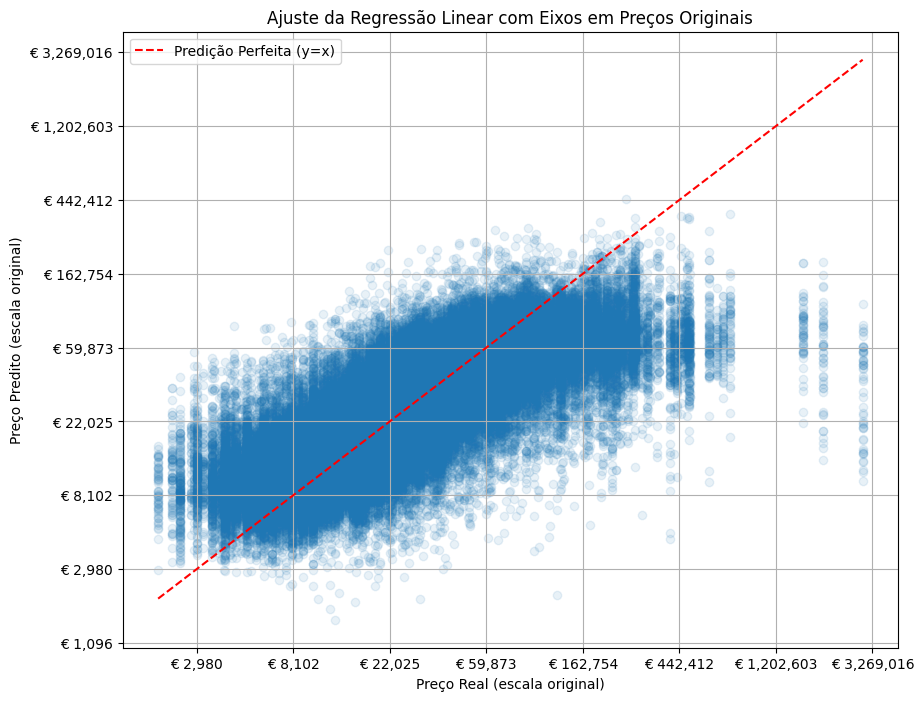

In [29]:


# Caminho do arquivo para salvar o modelo
linear_path = 'linear_model.joblib'

# Verifica se já existe
if os.path.exists(linear_path):
    print("Carregando Regressão Linear")
    linear_model = load(linear_path)
else:
    print("Treinando Regressão Linear")
    linear_model = LinearRegression()
    linear_model.fit(X_train_scaled, Y_train_log)
    dump(linear_model, linear_path)

# 5. Avaliação Interna (no conjunto de treino)
Y_train_pred_log = linear_model.predict(X_train_scaled)

scores = cross_val_score(
    linear_model,
    X_train_scaled,
    Y_train_log,
    cv=3,  # 3 folds para rodar mais rápido
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
rmse_cv = (-scores.mean()) ** 0.5
print(f'RMSE médio (CV) da Regressão Linear: {rmse_cv:.2f}')


# 7. Plotagem Correta
# A plotagem é feita no espaço log-transformado para visualizar a linearidade.
plt.figure(figsize=(10, 8))
plt.scatter(Y_train_log, Y_train_pred_log, alpha=0.1)

# 2. Definir a função de formatação dos eixos
# O formatter recebe o valor logarítmico (x) e retorna o valor original (exp(x) - 1) formatado
def original_price_formatter(x, pos):
    # np.expm1(x) é o mesmo que np.exp(x) - 1
    return f'€ {np.expm1(x):,.0f}'

# 3. Aplicar o Formatter aos eixos X e Y
formatter = FuncFormatter(original_price_formatter)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Linha de predição perfeita (y=x)
lims = [Y_train_log.min(), Y_train_log.max()]
plt.plot(lims, lims, color='red', linestyle='--', label='Predição Perfeita (y=x)')

plt.xlabel('Preço Real (escala original)')
plt.ylabel('Preço Predito (escala original)')
plt.title('Ajuste da Regressão Linear com Eixos em Preços Originais')
plt.legend()
plt.grid(True)
plt.show()

# K-Nearest Neighbors (KNN)

In [16]:
# Caminho para salvar o modelo
knn_path = 'knn_model.joblib'

# --- Verifica se o modelo já existe ---
if os.path.exists(knn_path):
    print("Carregando KNN salvo")
    best_knn = load(knn_path)
else:
    print("Treinando KNN")
    knn = KNeighborsRegressor(algorithm='auto')

    param_grid = {
        'n_neighbors': [1, 3, 5, 7, 9, 15, 25],
        'weights': ['distance']
    }

    grid = GridSearchCV(
        estimator=knn,
        param_grid=param_grid,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=2
    )

    grid.fit(X_train_scaled, Y_train_log)
    best_knn = grid.best_estimator_

    print("Melhor k encontrado:", grid.best_params_)
    
    # Salva o modelo
    dump(best_knn, knn_path)

# --- Previsão ---
Y_pred_knn_log = best_knn.predict(X_test_scaled)

# --- Avaliação via Cross-Validation ---
scores = cross_val_score(
    best_knn,
    X_train_scaled,
    Y_train_log,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
rmse_knn = (-scores.mean()) ** 0.5
print(f'RMSE médio (CV) do KNN: {rmse_knn:.2f}')

Carregando KNN salvo
RMSE médio (CV) do KNN: 0.55


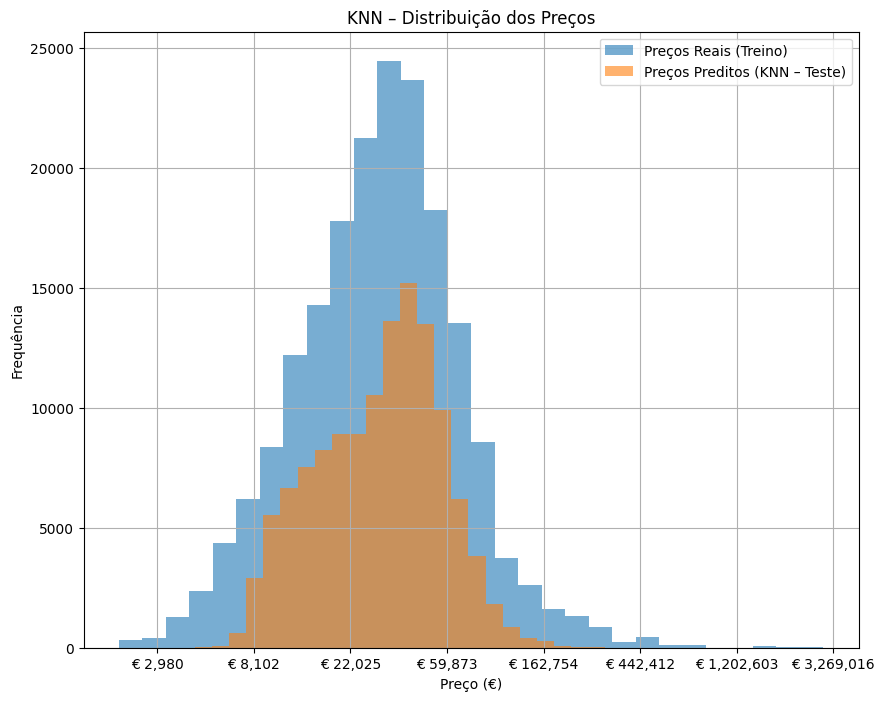

In [17]:
plt.figure(figsize=(10, 8))

plt.hist(
    Y_train_log,
    bins=30,
    alpha=0.6,
    label='Preços Reais (Treino)'
)

plt.hist(
    Y_pred_knn_log,
    bins=30,
    alpha=0.6,
    label='Preços Preditos (KNN – Teste)'
)

def euro_formatter(x, pos):
    return f'€ {np.expm1(x):,.0f}'

formatter = FuncFormatter(euro_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

plt.xlabel('Preço (€)')
plt.ylabel('Frequência')
plt.title('KNN – Distribuição dos Preços')
plt.legend()
plt.grid(True)
plt.show()



# Random Forest

In [25]:
# Caminho para salvar o modelo
rf_path = 'rf_model.joblib'

# --- Verifica se o modelo já existe ---
if os.path.exists(rf_path):
    print("Carregando Random Forest")
    best_rf = load(rf_path)
else:
    print("Treinando Random Forest")
    rf = RandomForestRegressor(random_state=42, n_jobs=-1)

    param_grid_rf = {
        'n_estimators': [50, 100],
        'max_depth': [4, 6, 8],
        'min_samples_leaf': [20, 50]
    }

    grid_rf = GridSearchCV(
        estimator=rf,
        param_grid=param_grid_rf,
        cv=3,  # folds mais rápidos
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )

    grid_rf.fit(X_train_scaled, Y_train_log)
    best_rf = grid_rf.best_estimator_

    print("Melhores parâmetros do Random Forest:", grid_rf.best_params_)

    # Salva o modelo
    dump(best_rf, rf_path)

# --- 3. Previsão ---
Y_pred_rf_log = best_rf.predict(X_test_scaled)

# --- 4. Avaliação via Cross-Validation ---
scores = cross_val_score(
    best_rf,
    X_train_scaled,
    Y_train_log,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
rmse_radomforest = (-scores.mean()) ** 0.5
print(f'RMSE médio (CV) do Random Forest: {rmse_radomforest:.2f}')




Carregando Random Forest
RMSE médio (CV) do Random Forest: 0.50


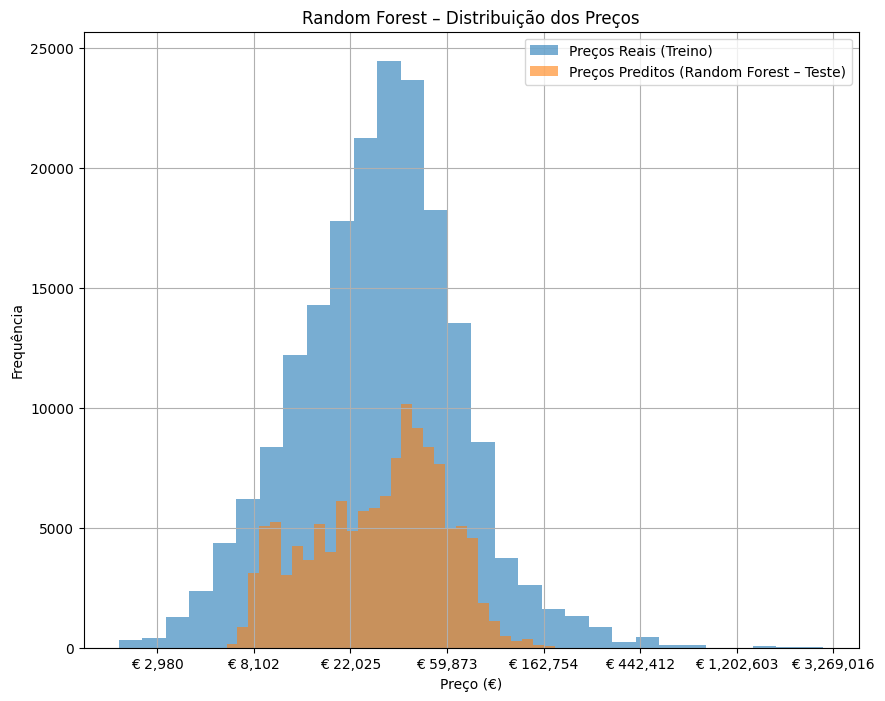

In [26]:
plt.figure(figsize=(10, 8))

plt.hist(
    Y_train_log,
    bins=30,
    alpha=0.6,
    label='Preços Reais (Treino)'
)

plt.hist(
    Y_pred_rf_log,
    bins=30,
    alpha=0.6,
    label='Preços Preditos (Random Forest – Teste)'
)

def euro_formatter(x, pos):
    return f'€ {np.expm1(x):,.0f}'

formatter = FuncFormatter(euro_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

plt.xlabel('Preço (€)')
plt.ylabel('Frequência')
plt.title('Random Forest – Distribuição dos Preços')
plt.legend()
plt.grid(True)
plt.show()


# XGBoost Regressor

In [28]:
xgb_path = 'xgb_model.joblib'

if os.path.exists(xgb_path):
    print("Carregando XGBoost")
    best_xgb = load(xgb_path)
else:
    print("Treinando XGBoost")
    xgb_model = xgb.XGBRegressor(
        random_state=42,
        n_jobs=-1
    )

    param_grid_xgb = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.05, 0.1, 0.2],
        'subsample': [0.7, 1.0]
    }

    grid_xgb = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid_xgb,
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )

    grid_xgb.fit(X_train_scaled, Y_train_log)
    best_xgb = grid_xgb.best_estimator_
    print("Melhores parâmetros do XGBoost:", grid_xgb.best_params_)

    dump(best_xgb, xgb_path)

    
# --- 3. Previsão ---
Y_pred_xgb_log = best_xgb.predict(X_test_scaled)

# --- 4. Avaliação via Cross-Validation ---
scores = cross_val_score(
    best_xgb,
    X_train_scaled,
    Y_train_log,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
rmse_xgboost = (-scores.mean()) ** 0.5
print(f'RMSE médio (CV) do XGBoost: {rmse_xgboost:.2f}')

Carregando XGBoost
RMSE médio (CV) do XGBoost: 0.49


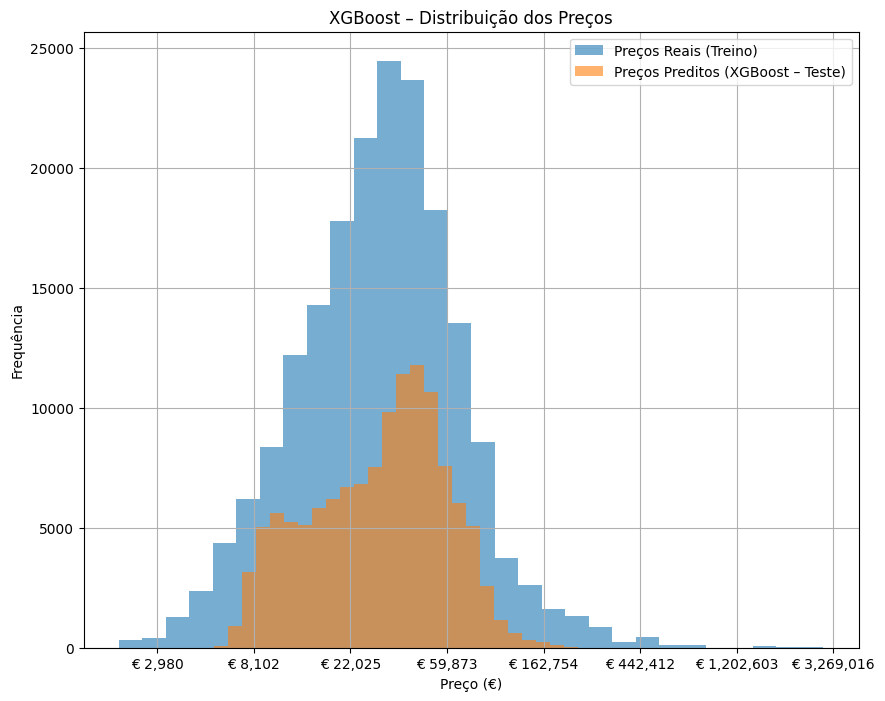

In [29]:
plt.figure(figsize=(10, 8))

plt.hist(
    Y_train_log,
    bins=30,
    alpha=0.6,
    label='Preços Reais (Treino)'
)

plt.hist(
    Y_pred_xgb_log,
    bins=30,
    alpha=0.6,
    label='Preços Preditos (XGBoost – Teste)'
)

def euro_formatter(x, pos):
    return f'€ {np.expm1(x):,.0f}'

formatter = FuncFormatter(euro_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

plt.xlabel('Preço (€)')
plt.ylabel('Frequência')
plt.title('XGBoost – Distribuição dos Preços')
plt.legend()
plt.grid(True)
plt.show()


# Árvores de Decisão

In [42]:

# Caminho do arquivo para salvar o modelo
tree_path = 'decision_tree_model.joblib'

# Verifica se já existe o modelo salvo
if os.path.exists(tree_path):
    print("Carregando Árvore de Decisão")
    best_tree = load(tree_path)
else:
    print("Treinando Árvore de Decisão")
    # Inicializar o modelo
    tree_model = DecisionTreeRegressor(random_state=42)

    # Grade de hiperparâmetros
    param_grid_tree = {
        'max_depth': [4, 6, 8],
        'min_samples_leaf': [20, 50, 100]
    }

    # Grid Search
    grid_tree = GridSearchCV(
        estimator=tree_model,
        param_grid=param_grid_tree,
        cv=3,  # folds mais rápidos
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )

    grid_tree.fit(X_train_scaled, Y_train_log)
    best_tree = grid_tree.best_estimator_
    print("Melhores parâmetros da Árvore de Decisão:", grid_tree.best_params_)

    # Salvar o modelo
    dump(best_tree, tree_path)

# --- 3. Previsão ---
Y_pred_tree_log = best_tree.predict(X_test_scaled)

# --- 4. Avaliação via Cross-Validation ---
scores = cross_val_score(
    best_tree,
    X_train_scaled,
    Y_train_log,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
rmse_decisiontree = (-scores.mean()) ** 0.5
print(f'RMSE médio (CV) da Árvore de Decisão: {rmse_decisiontree:.2f}')


Carregando Árvore de Decisão
RMSE médio (CV) da Árvore de Decisão: 0.51


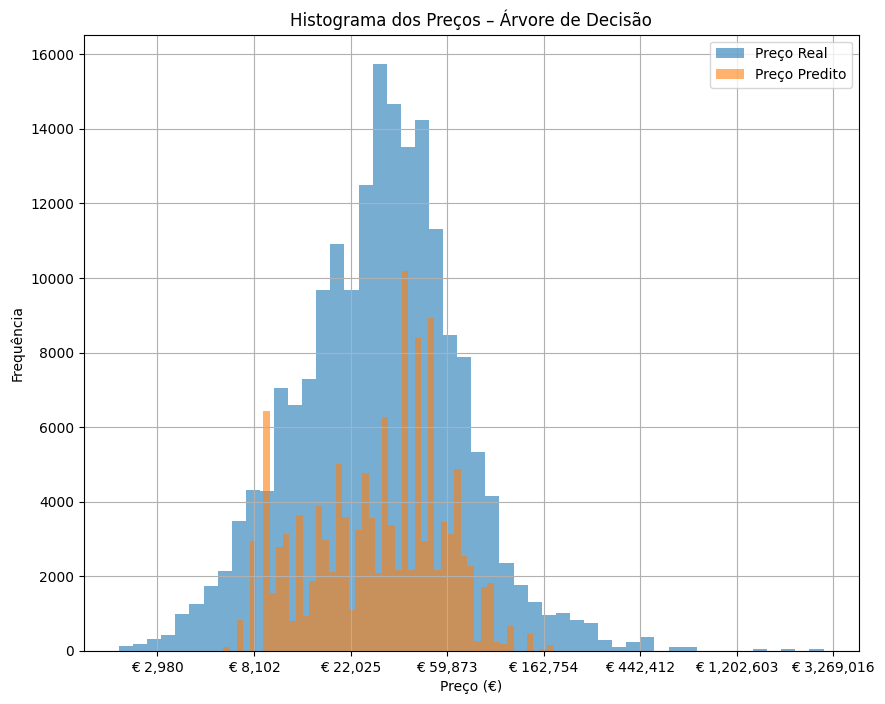

In [ ]:
plt.figure(figsize=(10, 8))

plt.hist(Y_train_log, bins=50, alpha=0.6, label='Preço Real')
plt.hist(Y_pred_tree_log, bins=50, alpha=0.6, label='Preço Predito')

def original_price_formatter(x, pos):
    return f'€ {np.expm1(x):,.0f}'

formatter = FuncFormatter(original_price_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

plt.xlabel('Preço (€)')
plt.ylabel('Frequência')
plt.title('Histograma dos Preços – Árvore de Decisão')
plt.legend()
plt.grid(True)
plt.show()




# Redes Neurais 

In [23]:
# Caminho para salvar o modelo
nn_path = 'nn_model.joblib'

# --- Verifica se o modelo já existe ---
if os.path.exists(nn_path):
    print("Carregando Rede Neural")
    best_nn = load(nn_path)
else:
    print("Treinando Rede Neural")
    nn_model = MLPRegressor(
        max_iter=1000,
        random_state=42
    )

    param_grid_nn = {
        'hidden_layer_sizes': [(50, 25), (100, 50), (100, 100)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'learning_rate_init': [0.001, 0.01]
    }

    grid_nn = GridSearchCV(
        estimator=nn_model,
        param_grid=param_grid_nn,
        cv=3,  # folds mais rápidos
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )

    grid_nn.fit(X_train_scaled, Y_train_log)
    best_nn = grid_nn.best_estimator_

    print("Melhores parâmetros da Rede Neural:", grid_nn.best_params_)

    # Salva o modelo
    dump(best_nn, nn_path)

# --- 3. Previsão ---
Y_pred_nn_log = best_nn.predict(X_test_scaled)

# --- Clipping para manter previsões dentro do range do treino ---
min_log = Y_train_log.min()
max_log = Y_train_log.max()
Y_pred_nn_log = np.clip(Y_pred_nn_log, min_log, max_log)

# Converter para escala original (euros)
Y_pred_nn = np.expm1(Y_pred_nn_log)

# --- 4. Avaliação via Cross-Validation ---
scores = cross_val_score(
    best_nn,
    X_train_scaled,
    Y_train_log,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
rmse_redeneural = (-scores.mean()) ** 0.5
print(f'RMSE médio (CV) da Rede Neural: {rmse_redeneural:.2f}')

Carregando Rede Neural
RMSE médio (CV) da Rede Neural: 0.51


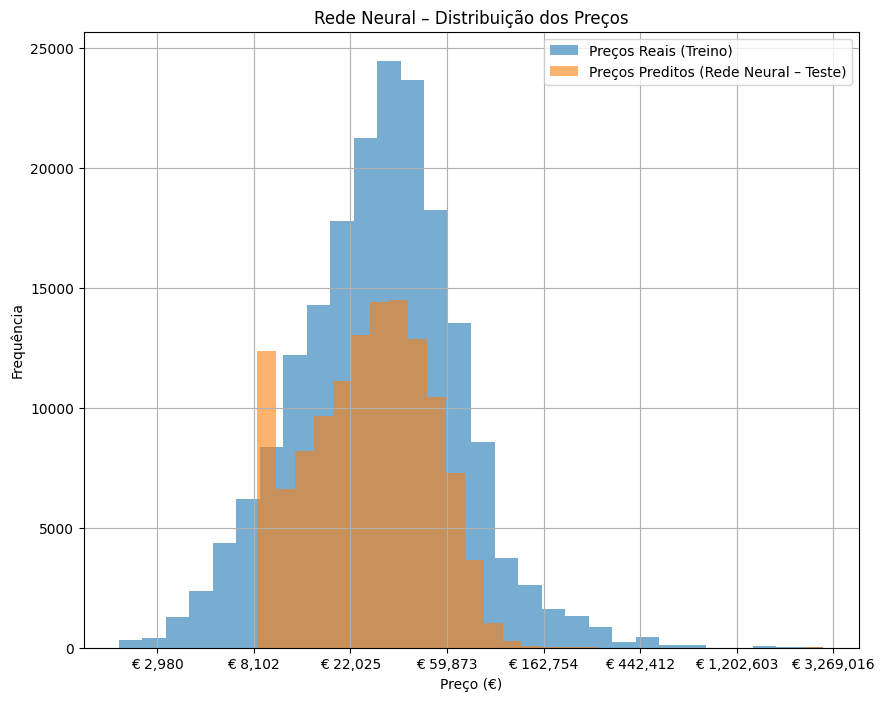

Max real (€): 2954083.0000000023
Max NN (€): 2954083.0000000023


In [24]:
plt.figure(figsize=(10, 8))

plt.hist(
    Y_train_log,
    bins=30,
    alpha=0.6,
    label='Preços Reais (Treino)'
)

plt.hist(
    Y_pred_nn_log,
    bins=30,
    alpha=0.6,
    label='Preços Preditos (Rede Neural – Teste)'
)

def euro_formatter(x, pos):
    return f'€ {np.expm1(x):,.0f}'

formatter = FuncFormatter(euro_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

plt.xlabel('Preço (€)')
plt.ylabel('Frequência')
plt.title('Rede Neural – Distribuição dos Preços')
plt.legend()
plt.grid(True)
plt.show()

print("Max real (€):", np.expm1(Y_train_log.max()))
print("Max NN (€):", np.expm1(Y_pred_nn_log.max()))



# Support Vector Machines (SVM)

Sobre o modelo Support Vector Machines (SVM) para a previsão do target.

Primeiramente foi utilizado o SVR com kernel RBF, para permitir a modelação de relações não lineares entre as variáveis, no entanto, devido ao grande tamanho do dataset, o treino demorava demasiado tempo a ser concluído. 

Foi então utilizado o LinearSVR, que é mais eficiente para os datasets grandes, conseguindo assim incluir este modelo na comparação das previsões.



### Utilizando kenrel RBF

In [ ]:
from sklearn.svm import SVR

svm_model = SVR(
    kernel='rbf',
    C=100,
    gamma='scale',
    epsilon=0.1
)

svm_model.fit(X_train_scaled, Y_train_log)

Y_pred_svm_log = svm_model.predict(X_test_scaled)

Y_pred_svm_original = np.expm1(Y_pred_svm_log)



In [ ]:
plt.figure(figsize=(10, 8))



plt.hist(Y_train_log, bins=30, alpha=0.6, label='Preços Reais (Treino)')
plt.hist(Y_pred_svm_log, bins=30, alpha=0.6, label='Preços Preditos (SVM – Teste)')

def euro_formatter(x, pos):
    return f'€ {np.expm1(x):,.0f}'

formatter = FuncFormatter(euro_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

plt.xlabel('Preço (€)')
plt.ylabel('Frequência')
plt.title('SVM – Distribuição dos Preços')
plt.legend()
plt.grid(True)
plt.show()


### Utilizando LinearSVR

In [19]:
# Caminho para salvar o modelo
svm_path = 'svm_model.joblib'

# --- Verifica se o modelo já existe ---
if os.path.exists(svm_path):
    print("Carregando modelo LinearSVR salvo...")
    best_svm = load(svm_path)
else:
    print("Treinando LinearSVR...")
    svm_model = LinearSVR(
        C=1.0,          # ajustar ou usar GridSearchCV se quiser
        epsilon=0.1,
        max_iter=10000,  # aumenta se não convergir
        random_state=42
    )

    # Treina o modelo
    svm_model.fit(X_train_scaled, Y_train_log)
    best_svm = svm_model

    # Salva o modelo
    dump(best_svm, svm_path)

# --- Previsão ---
Y_pred_svm_log = best_svm.predict(X_test_scaled)

# --- Avaliação via Cross-Validation ---
scores = cross_val_score(
    best_svm,
    X_train_scaled,
    Y_train_log,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
rmse_svm = (-scores.mean()) ** 0.5
print(f'RMSE médio (CV) do LinearSVR: {rmse_svm:.2f}')

Carregando modelo LinearSVR salvo...
RMSE médio (CV) do LinearSVR: 0.52


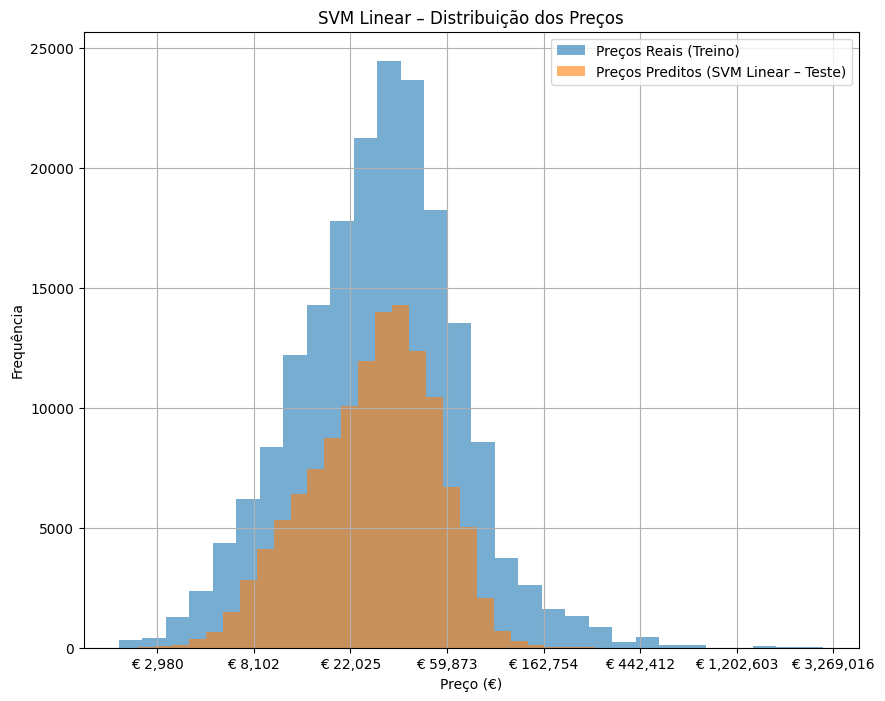

In [20]:
plt.figure(figsize=(10, 8))

plt.hist(Y_train_log, bins=30, alpha=0.6, label='Preços Reais (Treino)')
plt.hist(Y_pred_svm_log, bins=30, alpha=0.6, label='Preços Preditos (SVM Linear – Teste)')

# Formatter para converter log -> preço original
def euro_formatter(x, pos):
    return f'€ {np.expm1(x):,.0f}'

formatter = FuncFormatter(euro_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

plt.xlabel('Preço (€)')
plt.ylabel('Frequência')
plt.title('SVM Linear – Distribuição dos Preços')
plt.legend()
plt.grid(True)
plt.show()


# Escolha do melhor modelo - Cross validation 

Explicar que essa validação do melhor modelo não inclui o SVM

- RMSE maior → predições mais afastadas dos valores reais, ou seja, o modelo é menos preciso.
- RMSE menor → predições mais próximas dos valores reais → modelo melhor.

,RMSE médio
XGBoost,0.490981
Random Forest,0.500291
Árvore de Decisão,0.507300
Rede Neural,0.511587
Regressão Linear,0.516566
LinearSVR,0.519167
KNN,0.553582


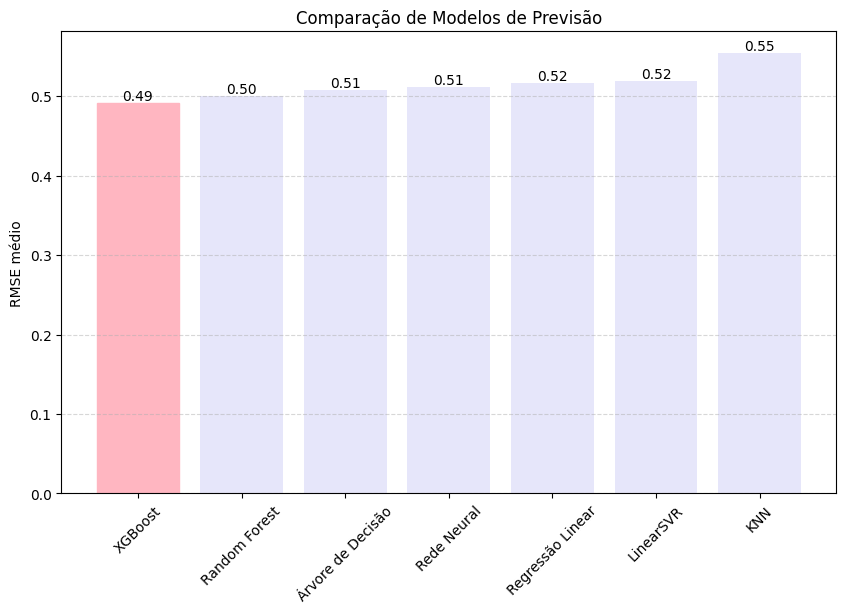

In [62]:
resultados = {
    'Regressão Linear': rmse_cv,
    'KNN': rmse_knn,               # RMSE do GridSearchCV
    'Árvore de Decisão': rmse_decisiontree,
    'Random Forest': rmse_radomforest,
    'Rede Neural': rmse_redeneural,
    'XGBoost': rmse_xgboost,
    'LinearSVR': rmse_svm          # acrescentado SVM
}

# --- 2. Criar DataFrame e ordenar do melhor para o pior ---
df_resultados = pd.DataFrame.from_dict(
    resultados,
    orient='index',
    columns=['RMSE médio']
).sort_values(by='RMSE médio')

# Mostrar a tabela
display(df_resultados)

# --- 3. Gráfico de barras ---
plt.figure(figsize=(10, 6))
bars = plt.bar(df_resultados.index, df_resultados['RMSE médio'], color='lavender')

# Destacar o melhor modelo (menor RMSE) em rosa
best_index = df_resultados['RMSE médio'].idxmin()
for bar, model in zip(bars, df_resultados.index):
    if model == best_index:
        bar.set_color('lightpink')

# Adicionar valores no topo das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom')

plt.ylabel('RMSE médio')
plt.title('Comparação de Modelos de Previsão')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# CSV Creation

# Linear Regression

In [ ]:
# 3. Fazer a Predição (no espaço logarítmico)
Y_test_pred_log = linear_model.predict(X_test_scaled)

# 4. Reverter a Transformação Logarítmica para Preços Originais
Y_test_pred_original = np.expm1(Y_test_pred_log)

# 5. Criar o DataFrame de Submissão
submission = pd.DataFrame({
    'id': test['id'],  # Usar o 'id' original do arquivo test.csv
    'price': Y_test_pred_original
})

submission.to_csv('submission_liner_regression.csv', index=False)

# K-Nearest Neighbors (KNN)

In [18]:
# 3. Fazer a Predição (no espaço logarítmico)

Y_pred_knn_log = best_knn.predict(X_test_scaled)

# 4. Reverter a Transformação Logarítmica para Preços Originais

Y_pred_knn_original = np.expm1(Y_pred_knn_log)

# 5. Criar o DataFrame de Submissão
submission = pd.DataFrame({
    'id': test['id'],  # Usar o 'id' original do arquivo test.csv
    'price': Y_pred_knn_original
})

submission.to_csv('submission_KNN.csv', index=False)

# Random Forest

In [ ]:
# 3. Fazer a Predição (no espaço logarítmico)

Y_pred_rf = rf.predict(X_test_scaled)

# 4. Reverter a Transformação Logarítmica para Preços Originais

Y_pred_rf_original = np.expm1(Y_pred_rf)

# 5. Criar o DataFrame de Submissão
submission = pd.DataFrame({
    'id': test['id'],  # Usar o 'id' original do arquivo test.csv
    'price': Y_pred_rf_original
})

submission.to_csv('submission_RandomForest.csv', index=False)

# XGBoost Regressor

In [ ]:
# 3. Fazer a Predição (no espaço logarítmico)

Y_pred_xgb_log = best_xgb.predict(X_test_scaled)

# 4. Reverter a Transformação Logarítmica para Preços Originais

Y_pred_xgb_original = np.expm1(Y_pred_xgb_log)

# 5. Criar o DataFrame de Submissão
submission = pd.DataFrame({
    'id': test['id'],  # Usar o 'id' original do arquivo test.csv
    'price': Y_pred_xgb_original
})

submission.to_csv('submission_XGBoost.csv', index=False)

: 

# Árvores de decisão 

In [70]:
Y_pred_tree_log = best_tree.predict(X_test_scaled)

Y_test_pred_original = np.expm1(Y_pred_tree_log)

submission = pd.DataFrame({
    'id': test['id'],      # id do test.csv
    'price': Y_test_pred_original
})

submission.to_csv('submission_tree_model.csv', index=False)



# Redes Neurais 

In [25]:
# 3. Fazer a Predição (no espaço logarítmico)
Y_pred_nn_log = best_nn.predict(X_test_scaled)

# 4. Reverter a Transformação Logarítmica para Preços Originais
Y_pred_nn_original = np.expm1(Y_pred_nn_log)

# 5. Criar o DataFrame de Submissão
submission = pd.DataFrame({
    'id': test['id'],  # Usar o 'id' original do arquivo test.csv
    'price': Y_pred_nn_original
})

submission.to_csv('submission_neural_network.csv', index=False)

# Support Vector Machines (SVM)

In [27]:
# 3. Fazer a Predição (no espaço logarítmico)
Y_pred_svm_log = best_svm.predict(X_test_scaled)

# 4. Reverter a Transformação Logarítmica para Preços Originais
Y_pred_svm_original = np.expm1(Y_pred_svm_log)

# 5. Criar o DataFrame de Submissão
submission = pd.DataFrame({
    'id': test['id'],  # Usar o 'id' original do arquivo test.csv
    'price': Y_pred_svm_original
})

submission.to_csv('submission_svm.csv', index=False)

Aluna: Thayla Leal | Nº aluno: a81345 | Email: a81345@ualg.pt

Aluna: Inês Costa | Nº aluno: a79296 | Email: a79296@ualg.pt